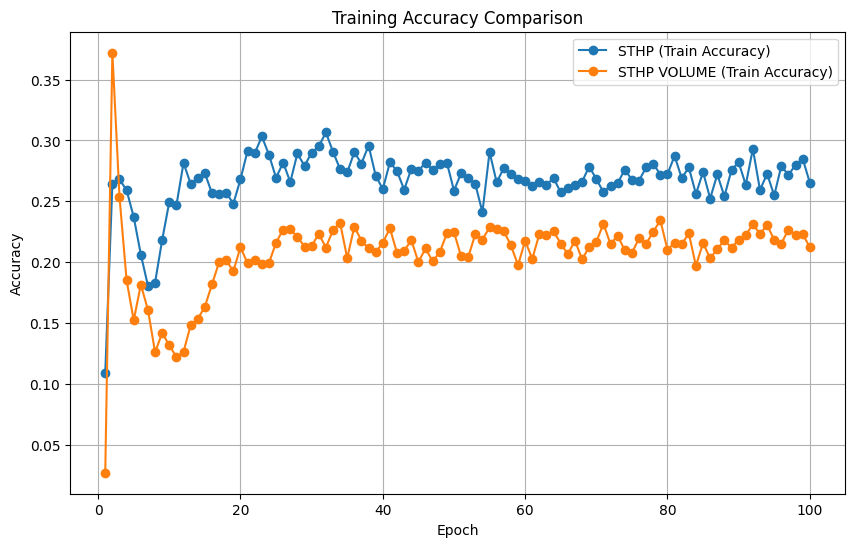

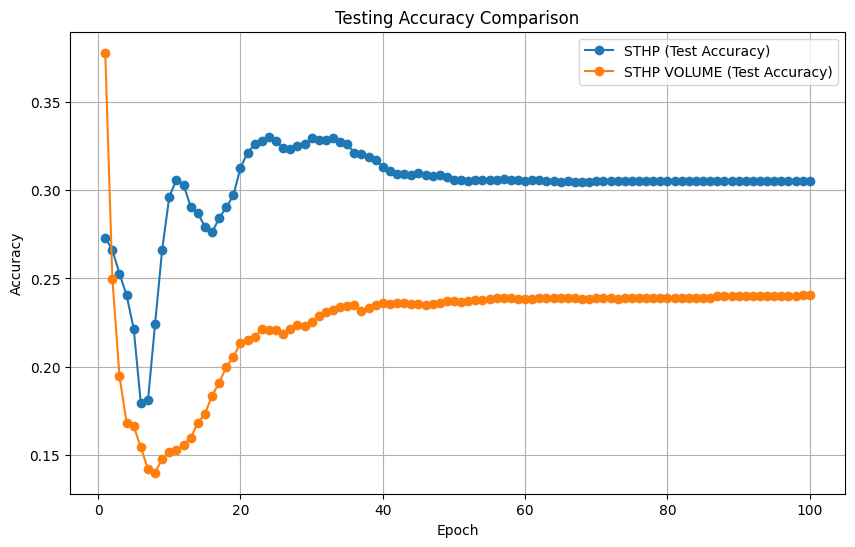

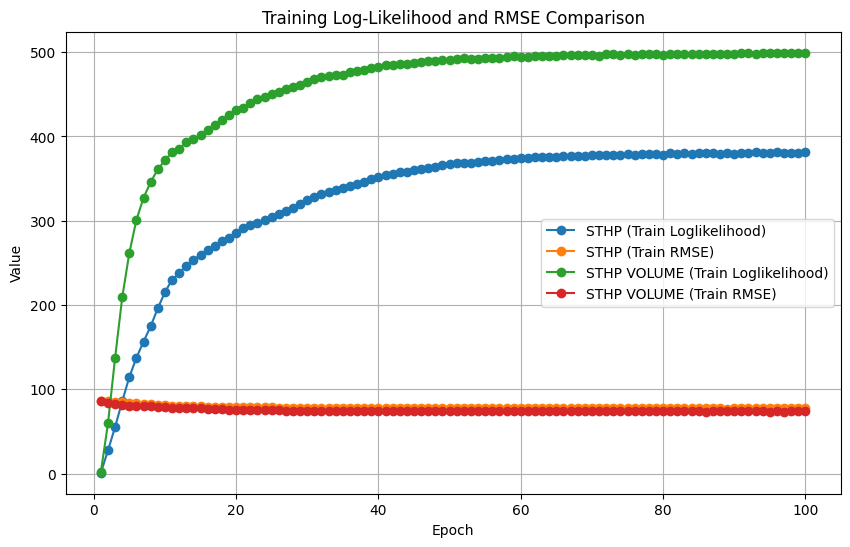

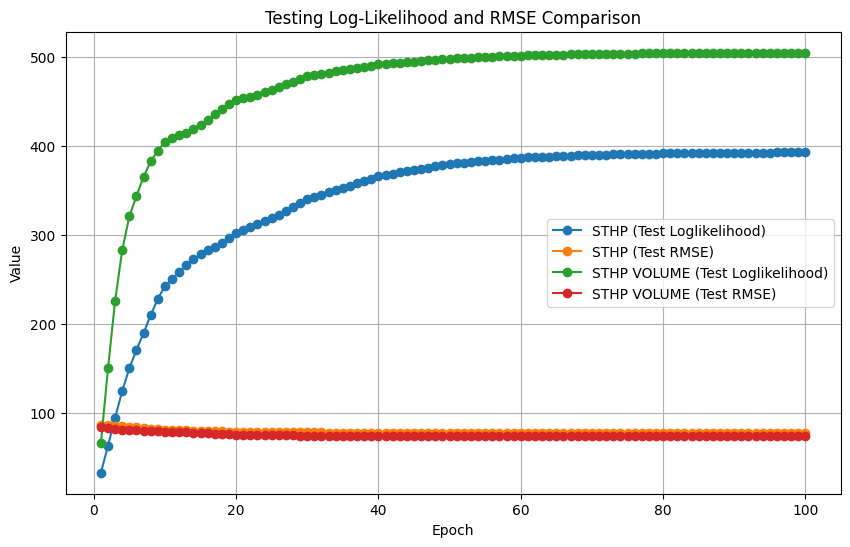

In [7]:
import re
import matplotlib.pyplot as plt

def extract_metrics(file_path):
    """Extract training and testing metrics from the given file."""
    epochs = []
    train_loglikelihood, train_accuracy, train_rmse = [], [], []
    test_loglikelihood, test_accuracy, test_rmse = [], [], []

    with open(file_path, 'r') as file:
        for line in file:
            # Extract the epoch number
            epoch_match = re.match(r'\[ Epoch (\d+) \]', line)
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))

            # Extract training values
            train_match = re.match(r'\s+- \(Training\)\s+loglikelihood:\s+([\d.]+), accuracy:\s+([\d.]+), RMSE:\s+([\d.]+)', line)
            if train_match:
                train_loglikelihood.append(float(train_match.group(1)))
                train_accuracy.append(float(train_match.group(2)))
                train_rmse.append(float(train_match.group(3)))

            # Extract testing values
            test_match = re.match(r'\s+- \(Testing\)\s+loglikelihood:\s+([\d.]+), accuracy:\s+([\d.]+), RMSE:\s+([\d.]+)', line)
            if test_match:
                test_loglikelihood.append(float(test_match.group(1)))
                test_accuracy.append(float(test_match.group(2)))
                test_rmse.append(float(test_match.group(3)))

    return epochs, train_loglikelihood, train_accuracy, train_rmse, test_loglikelihood, test_accuracy, test_rmse

# Extract metrics from both files
file1_epochs, file1_train_ll, file1_train_acc, file1_train_rmse, file1_test_ll, file1_test_acc, file1_test_rmse = extract_metrics('Training Results STHP.txt')
file2_epochs, file2_train_ll, file2_train_acc, file2_train_rmse, file2_test_ll, file2_test_acc, file2_test_rmse = extract_metrics('Training Results Volume STHP.txt')

# Plot 1: Training Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.plot(file1_epochs, file1_train_acc, label='STHP (Train Accuracy)', marker='o')
plt.plot(file2_epochs, file2_train_acc, label='STHP VOLUME (Train Accuracy)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Testing Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.plot(file1_epochs, file1_test_acc, label='STHP (Test Accuracy)', marker='o')
plt.plot(file2_epochs, file2_test_acc, label='STHP VOLUME (Test Accuracy)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Training Log-Likelihood and RMSE Comparison
plt.figure(figsize=(10, 6))
plt.plot(file1_epochs, file1_train_ll, label='STHP (Train Loglikelihood)', marker='o')
plt.plot(file1_epochs, file1_train_rmse, label='STHP (Train RMSE)', marker='o')
plt.plot(file2_epochs, file2_train_ll, label='STHP VOLUME (Train Loglikelihood)', marker='o')
plt.plot(file2_epochs, file2_train_rmse, label='STHP VOLUME (Train RMSE)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Log-Likelihood and RMSE Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Testing Log-Likelihood and RMSE Comparison
plt.figure(figsize=(10, 6))
plt.plot(file1_epochs, file1_test_ll, label='STHP (Test Loglikelihood)', marker='o')
plt.plot(file1_epochs, file1_test_rmse, label='STHP (Test RMSE)', marker='o')
plt.plot(file2_epochs, file2_test_ll, label='STHP VOLUME (Test Loglikelihood)', marker='o')
plt.plot(file2_epochs, file2_test_rmse, label='STHP VOLUME (Test RMSE)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Testing Log-Likelihood and RMSE Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import pandas as pd
import pickle

def to_one_batch(path, name):
    df = pd.read_pickle(f'{path}/{name}.pkl')    
    
    arr = []
    for i in range(len(df[name])):
        arr += df[name][i]
        
    df[name] = [arr]
    
    with open(f"./updated_new_data/{name}.pkl", "wb") as file:
        pickle.dump(df, file)


In [38]:
to_one_batch('./new_data_STHP', 'dev')

In [20]:
df2 = pd.read_pickle('./data/train.pkl')

df2
len(df2['train'])

1

In [ ]:
dff = pd.read_pickle('./new_data_STHP/train.pkl')

print(dff['train'][0])

In [29]:
len(df['train'])

1

In [16]:
sum = 0

for i in range(20):
    print(len(df['test'][i]))
    sum += len(df['test'][i])
    
print(sum)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
399
820
497
240
29
2000
